### PROBLEM STATEMENT - MRA PROJECT - PART - B

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("dataset_group.csv")
data.shape

(20641, 3)

In [3]:
data.head()

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose


In [4]:
data.tail()

,Date,Order_id,Product
20636,25-02-2020,1138,soda
20637,25-02-2020,1138,paper towels
20638,26-02-2020,1139,soda
20639,26-02-2020,1139,laundry detergent
20640,26-02-2020,1139,shampoo


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


In [6]:
data.describe()

,Order_id
count,20641.000000
mean,575.986289
std,328.557078
min,1.000000
25%,292.000000
50%,581.000000
75%,862.000000
max,1139.000000


In [7]:
data.describe(include=["object"]).T

,count,unique,top,freq
Date,20641,603,08-02-2019,183
Product,20641,37,poultry,640


In [8]:
data.isnull().sum()

Date        0
Order_id    0
Product     0
dtype: int64

In [9]:
data.duplicated().sum()

4730

In [10]:
data = data.drop_duplicates()

In [11]:
data.shape

(15911, 3)

In [12]:
data.duplicated().sum()

0

In [13]:
print(data.describe(include="all"))  # Summary of all columns
print(data.nunique())  # Unique count of values in each column


              Date      Order_id  Product
count        15911  15911.000000    15911
unique         603           NaN       37
top     08-02-2019           NaN  poultry
freq           138           NaN      480
mean           NaN    574.150462      NaN
std            NaN    328.537425      NaN
min            NaN      1.000000      NaN
25%            NaN    289.500000      NaN
50%            NaN    579.000000      NaN
75%            NaN    859.000000      NaN
max            NaN   1139.000000      NaN
Date         603
Order_id    1139
Product       37
dtype: int64


In [14]:
# Number of unique transactions & products
print(f"Total Transactions: {data['Order_id'].nunique()}")
print(f"Total Unique Products: {data['Product'].nunique()}")


Total Transactions: 1139
Total Unique Products: 37


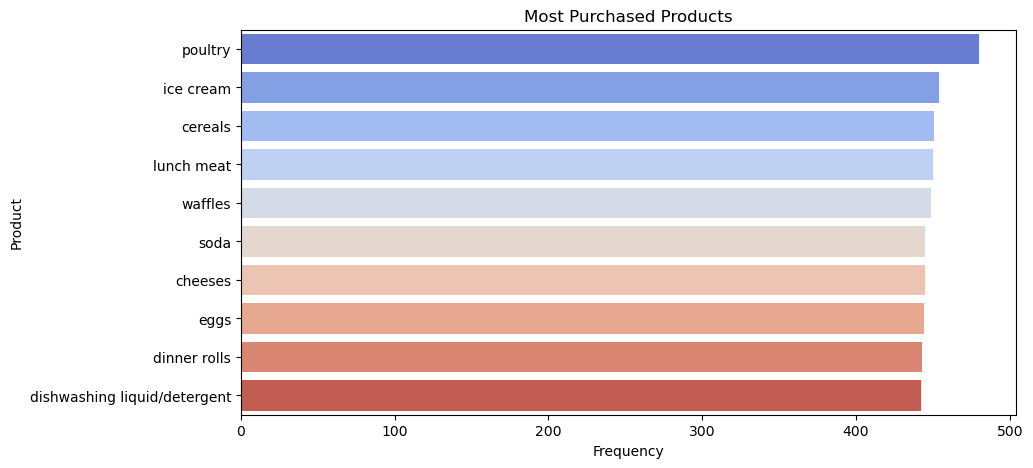

In [15]:
# Most purchased products
top_products = data['Product'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')
plt.xlabel("Frequency")
plt.ylabel("Product")
plt.title("Most Purchased Products")
plt.show()

In [16]:
# Convert Date column from object to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [17]:
# Check if conversion was successful
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 15911 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      6442 non-null   datetime64[ns]
 1   Order_id  15911 non-null  int64         
 2   Product   15911 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 497.2+ KB
None
        Date  Order_id        Product
0 2018-01-01         1         yogurt
1 2018-01-01         1           pork
2 2018-01-01         1  sandwich bags
3 2018-01-01         1     lunch meat
4 2018-01-01         1   all- purpose


In [18]:

# Extract Year, Month, Day, and Weekday
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week
data['Day'] = data['Date'].dt.day
data['Weekday'] = data['Date'].dt.day_name()

# Display first few rows to check
print(data.head())

        Date  Order_id        Product    Year  Month  Week  Day Weekday
0 2018-01-01         1         yogurt  2018.0    1.0     1  1.0  Monday
1 2018-01-01         1           pork  2018.0    1.0     1  1.0  Monday
2 2018-01-01         1  sandwich bags  2018.0    1.0     1  1.0  Monday
3 2018-01-01         1     lunch meat  2018.0    1.0     1  1.0  Monday
4 2018-01-01         1   all- purpose  2018.0    1.0     1  1.0  Monday


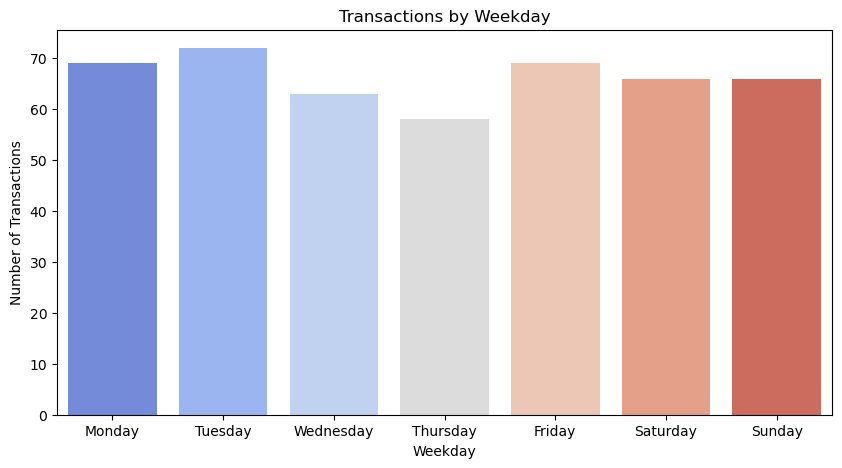

In [19]:
# Transactions by weekday
weekday_sales = data.groupby('Weekday')['Order_id'].nunique().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette='coolwarm')
plt.xlabel("Weekday")
plt.ylabel("Number of Transactions")
plt.title("Transactions by Weekday")
plt.show()

C:\Users\Benita Merlin E\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Benita Merlin E\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


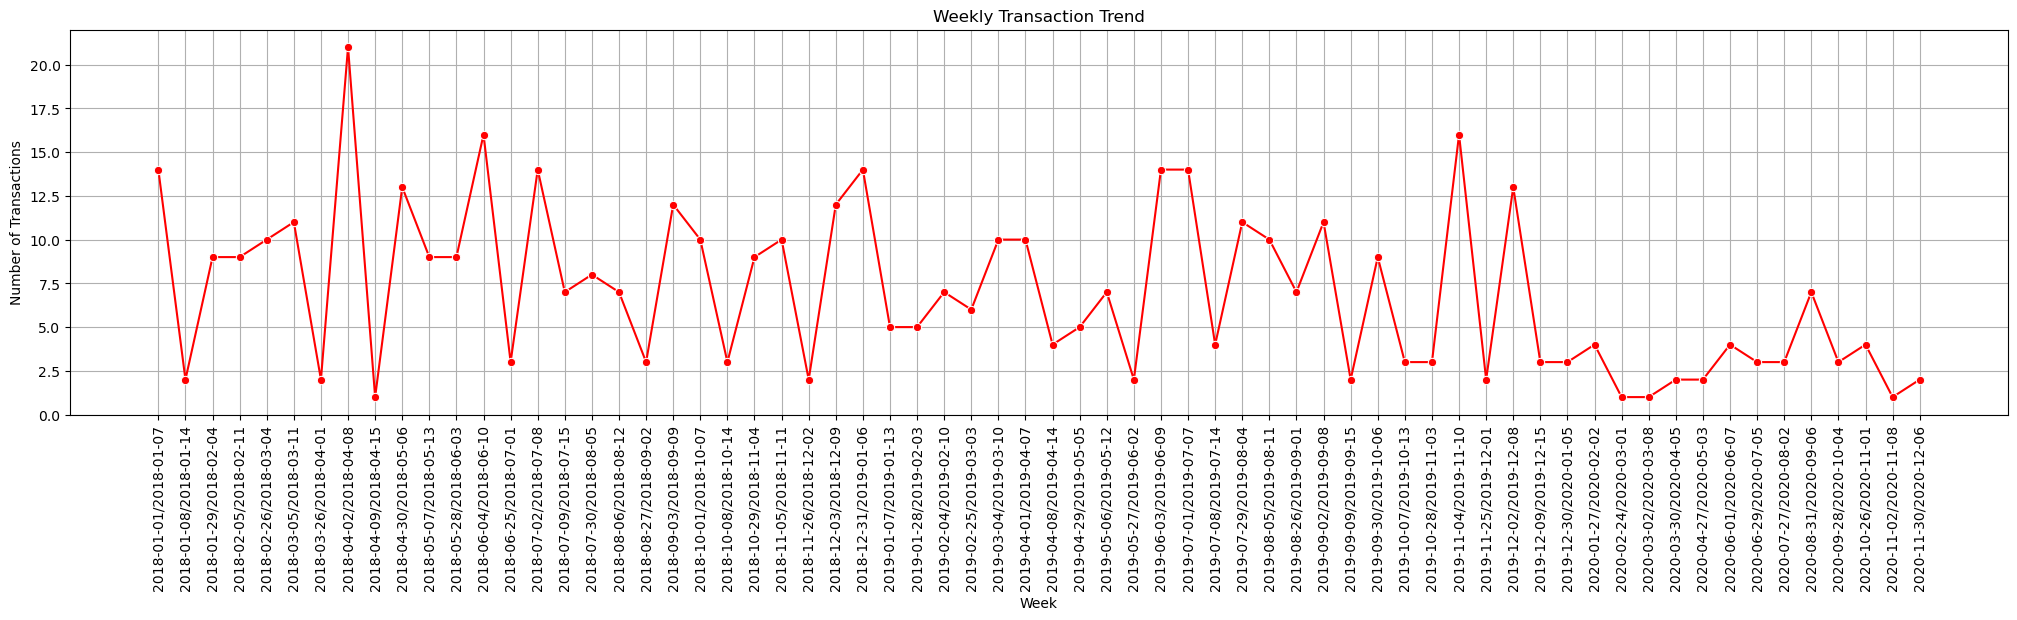

In [20]:
# Weekly transaction count
weekly_sales = data.groupby(data['Date'].dt.to_period('W'))['Order_id'].nunique()

plt.figure(figsize=(25, 5))
sns.lineplot(x=weekly_sales.index.astype(str), y=weekly_sales.values, marker='o', color='r')
plt.xticks(rotation=90)
plt.xlabel("Week")
plt.ylabel("Number of Transactions")
plt.title("Weekly Transaction Trend")
plt.grid()
plt.show()

In [21]:


# Extract Quarter information
data['Quarter'] = data['Date'].dt.to_period('Q')

# Check data
print(data[['Date', 'Quarter']].head())


        Date Quarter
0 2018-01-01  2018Q1
1 2018-01-01  2018Q1
2 2018-01-01  2018Q1
3 2018-01-01  2018Q1
4 2018-01-01  2018Q1


C:\Users\Benita Merlin E\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Benita Merlin E\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


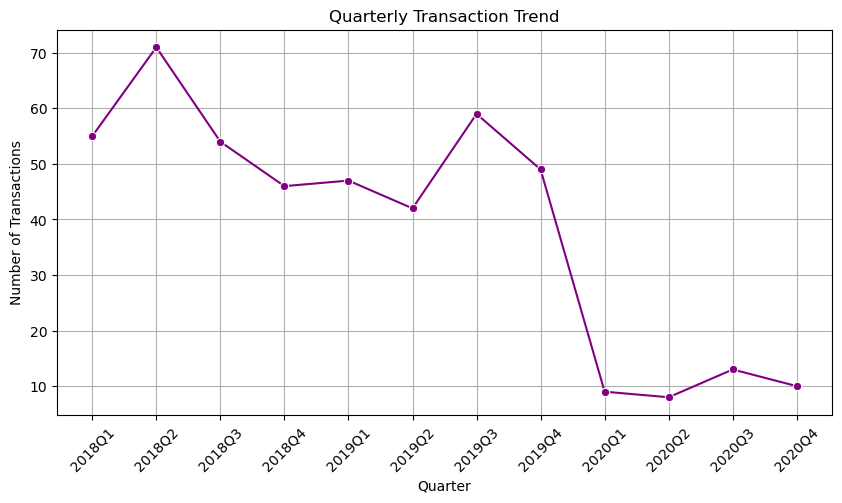

In [22]:
# Group by Quarter and count unique transactions
quarterly_sales = data.groupby('Quarter')['Order_id'].nunique()

# Plot Quarterly Transaction Trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=quarterly_sales.index.astype(str), y=quarterly_sales.values, marker='o', color='purple')
plt.xlabel("Quarter")
plt.ylabel("Number of Transactions")
plt.title("Quarterly Transaction Trend")
plt.xticks(rotation=45)
plt.grid()
plt.show()

C:\Users\Benita Merlin E\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Benita Merlin E\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


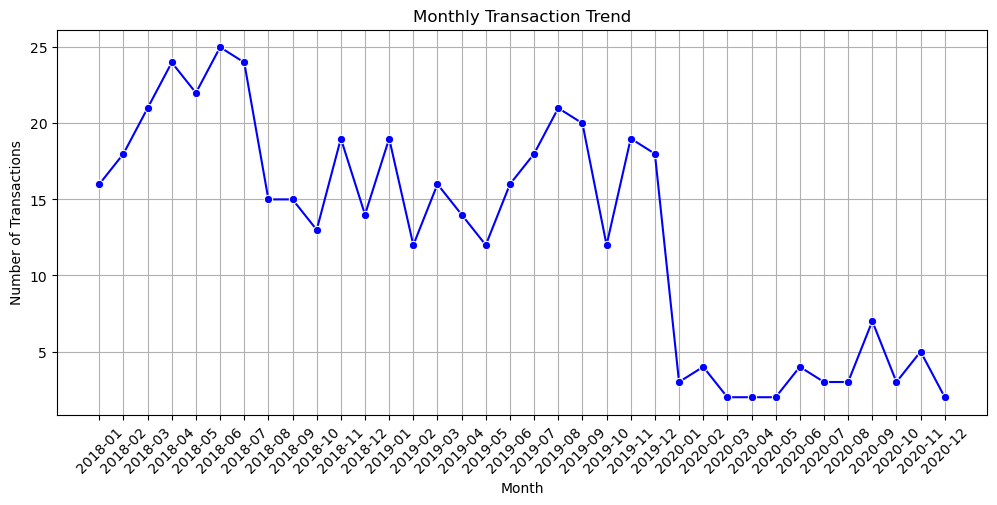

In [23]:
# Group by Month and count unique transactions
monthly_sales = data.groupby(data['Date'].dt.to_period('M'))['Order_id'].nunique()

# Plot Monthly Transaction Trends
plt.figure(figsize=(12, 5))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker='o', color='b')
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.title("Monthly Transaction Trend")
plt.grid()
plt.show()

        Date    Year
0 2018-01-01  2018.0
1 2018-01-01  2018.0
2 2018-01-01  2018.0
3 2018-01-01  2018.0
4 2018-01-01  2018.0


C:\Users\Benita Merlin E\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Benita Merlin E\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


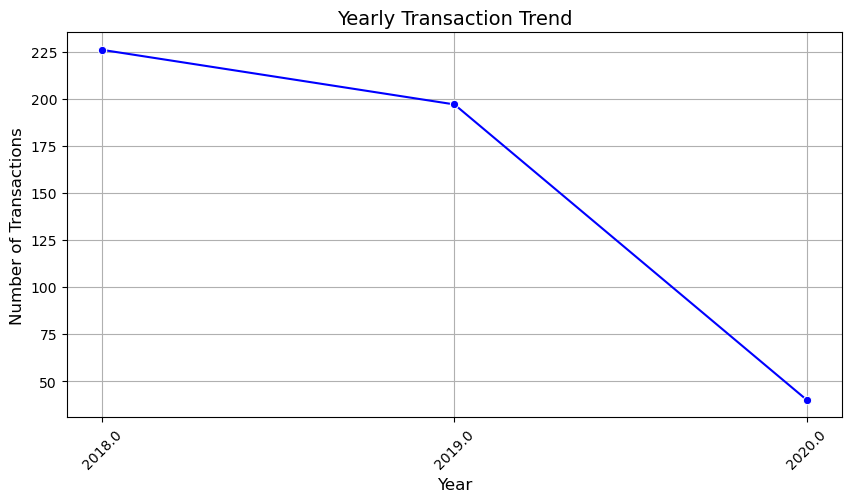

In [24]:
data["Year"] = data["Date"].dt.year  # Extract year from the date column

# Check data
print(data[["Date", "Year"]].head())

yearly_sales = data.groupby("Year")["Order_id"].nunique().reset_index()
yearly_sales.columns = ["Year", "Transactions"]

plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_sales["Year"].astype(str), y=yearly_sales["Transactions"], marker='o', color='blue')

# Formatting
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.title("Yearly Transaction Trend", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

C:\Users\Benita Merlin E\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


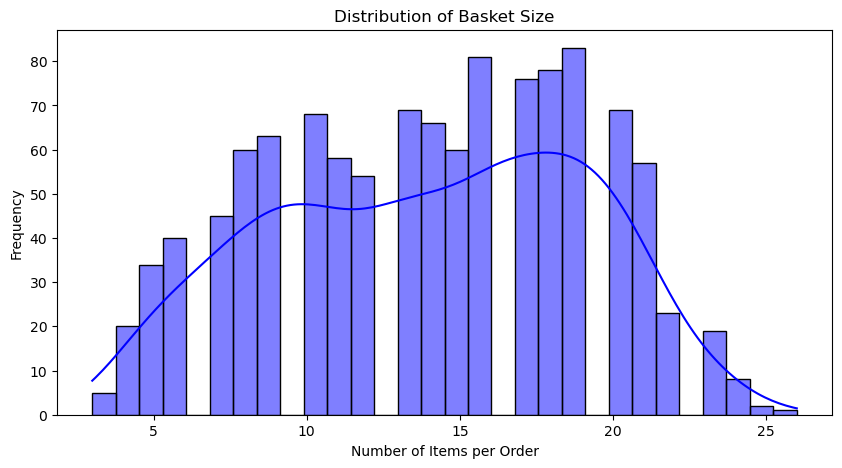

In [25]:
basket_size = data.groupby("Order_id")["Product"].count()  

plt.figure(figsize=(10, 5))  
sns.histplot(basket_size, bins=30, kde=True, color="blue")  
plt.xlabel("Number of Items per Order")  
plt.ylabel("Frequency")  
plt.title("Distribution of Basket Size")  
plt.show()  


In [26]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="twilight",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot
     

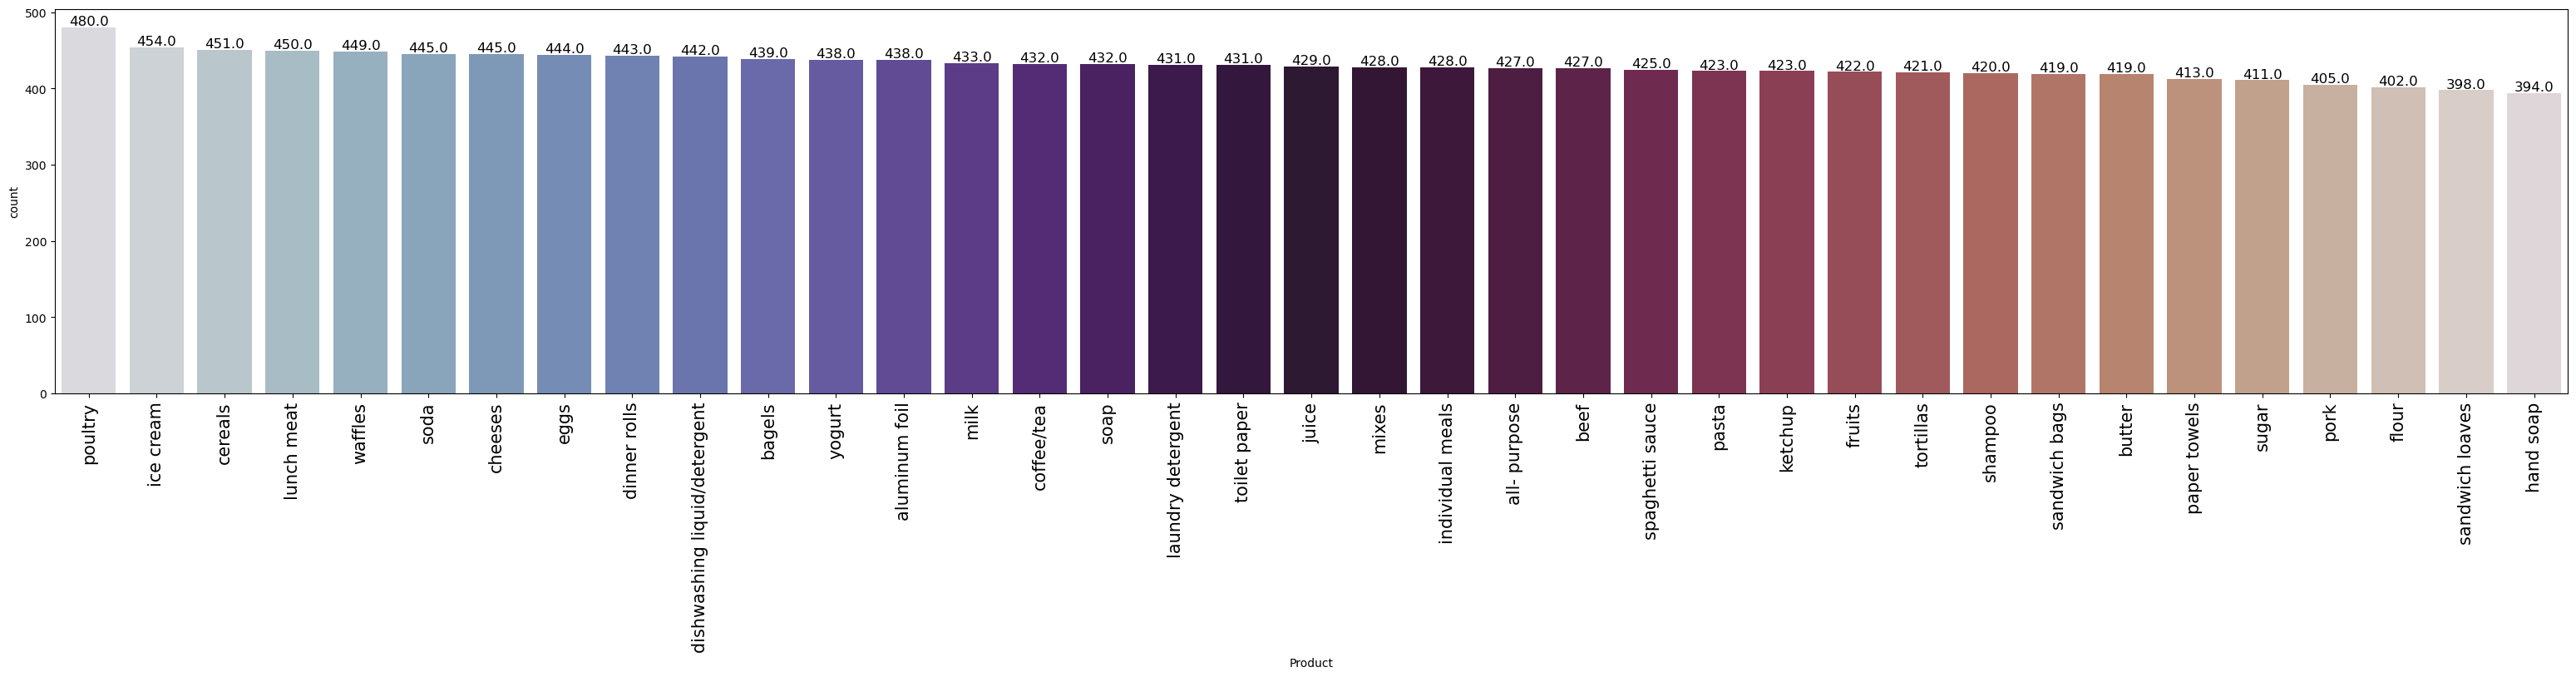

In [27]:
labeled_barplot(data, "Product")

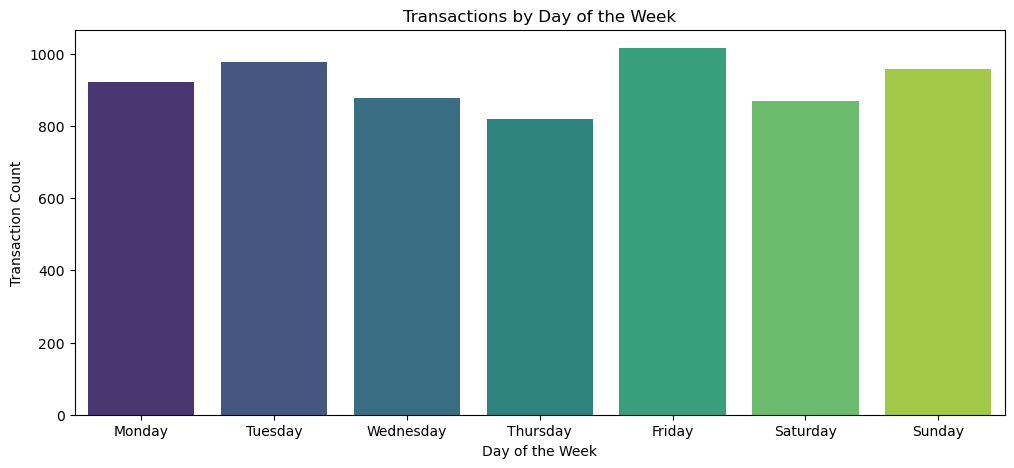

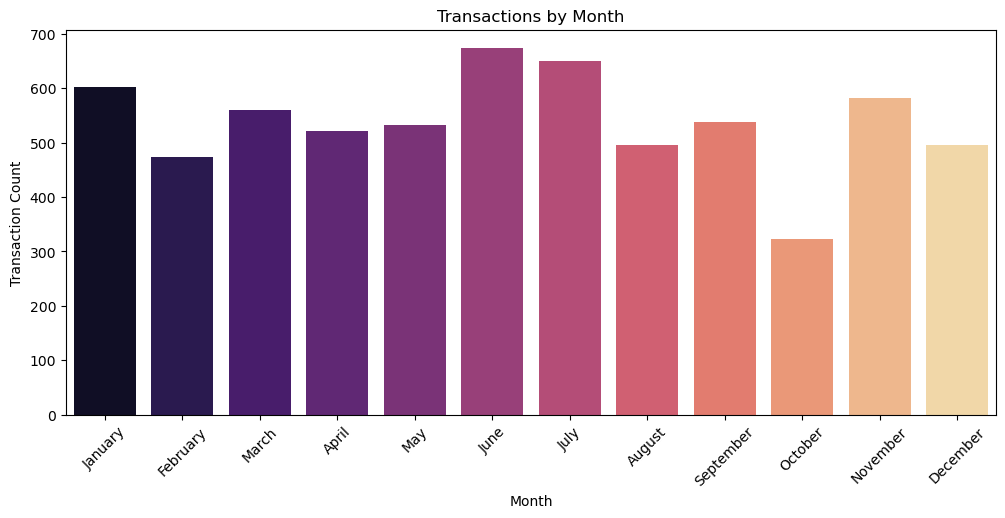

In [28]:
data["Day_of_Week"] = data["Date"].dt.day_name()  
data["Month"] = data["Date"].dt.month_name()  

plt.figure(figsize=(12, 5))  
sns.countplot(x="Day_of_Week", data=data, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="viridis")  
plt.title("Transactions by Day of the Week")  
plt.xlabel("Day of the Week")  
plt.ylabel("Transaction Count")  
plt.show()  

plt.figure(figsize=(12, 5))  
sns.countplot(x="Month", data=data, order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], palette="magma")  
plt.title("Transactions by Month")  
plt.xlabel("Month")  
plt.ylabel("Transaction Count")  
plt.xticks(rotation=45)  
plt.show()  


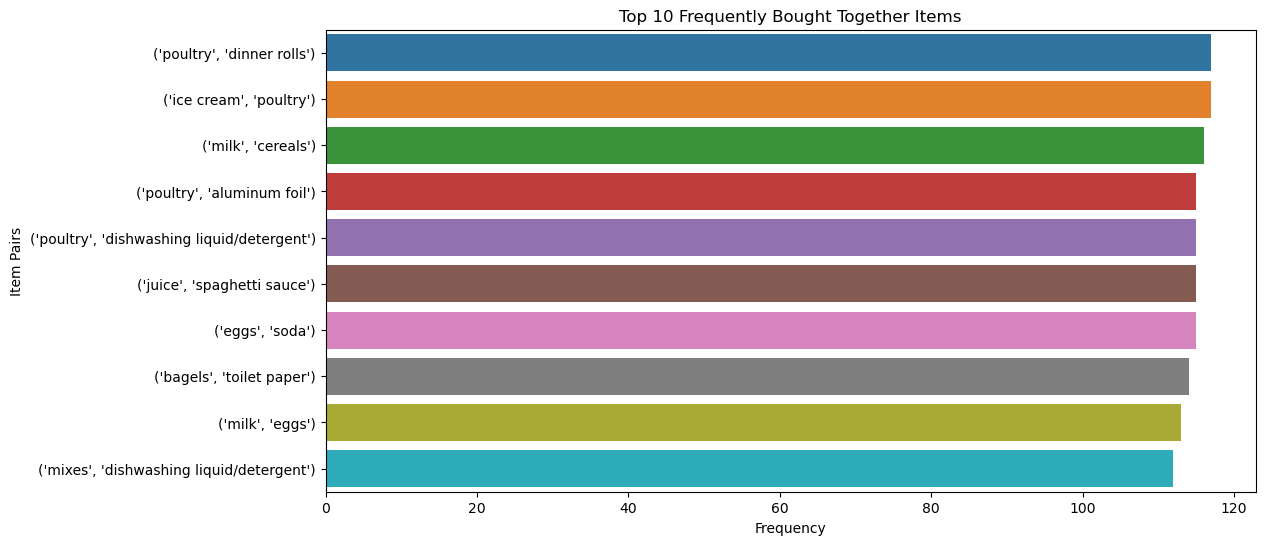

In [29]:
from itertools import combinations  
from collections import Counter  

# Group transactions by Order_id  
basket = data.groupby("Order_id")["Product"].apply(list)  

# Count item pairs  
pair_counts = Counter()  
for items in basket:  
    for pair in combinations(items, 2):  
        pair_counts[pair] += 1  

# Convert to DataFrame  
pair_data = pd.DataFrame(pair_counts.items(), columns=["Item_Pair", "Frequency"])  
pair_data = pair_data.sort_values(by="Frequency", ascending=False).head(10)  

# Plot top pairs  
plt.figure(figsize=(12, 6))  
sns.barplot(x=pair_data["Frequency"], y=pair_data["Item_Pair"].astype(str))  
plt.xlabel("Frequency")  
plt.ylabel("Item Pairs")  
plt.title("Top 10 Frequently Bought Together Items")  
plt.show()  


In [30]:
from mlxtend.frequent_patterns import apriori, association_rules  

# Convert dataset to transaction format  
basket_encoded = data.groupby(["Order_id", "Product"])["Product"].count().unstack().fillna(0)  
basket_encoded = basket_encoded.applymap(lambda x: 1 if x > 0 else 0)  

# Apply Apriori Algorithm  
frequent_itemsets = apriori(basket_encoded, min_support=0.01, use_colnames=True)  
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)  

# Display top rules  
print(rules.sort_values(by="lift", ascending=False).head(10))  


C:\Users\Benita Merlin E\AppData\Local\Temp\ipykernel_18992\4142400940.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = basket_encoded.applymap(lambda x: 1 if x > 0 else 0)
C:\Users\Benita Merlin E\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


MemoryError: Unable to allocate 103. GiB for an array with shape (2027547, 6, 1139) and data type int64